# Functions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import os
%matplotlib inline

In [ ]:
def ensure_dir(file_path):
    if not os.path.exists(file_path):
        os.makedirs(file_path)

# Main

In [ ]:
figmap = [[np.nan, 7,15,23,31,39,47,np.nan],
          [     1, 8,16,24,32,40,48,    55],
          [     2, 9,17,25,33,41,49,    56],
          [     3,10,18,26,34,42,50,    57],
          [     4,11,19,27,35,43,51,    58],
          [     5,12,20,28,36,44,52,    59],
          [     6,13,21,29,37,45,53,    60],
          [np.nan,14,22,30,38,46,54,np.nan]]
figmap = np.array(figmap)

In [ ]:
# exp_folder = 'D:\\GoogleDrive\\retina\\Chou\'s data\\20210706\\SplitData\\'
# exp_folder = 'D:\\GoogleDrive\\retina\\Troy\'s data\\20211029\\SplitData\\'
exp_folder = 'D:\\GoogleDrive\\retina\\Exps\\2021\\1028\\SplitData\\'
ensure_dir(exp_folder+'STA')

In [ ]:
import warnings
warnings.simplefilter('ignore')

# for Fc in [2,4,7,10]:
#     for unit in [1,2]:
for filename in os.listdir(exp_folder):
    if not (filename.find('repeat')==-1) or (filename.find('.mat')==-1):
        continue
    print(filename[:-17]+filename[-5])

    annots = loadmat(exp_folder+filename)
    dt = 0.01
    sampling_rate = 20000
    TimeStamps = np.squeeze(annots['TimeStamps'])
    x = annots['a_data'][0, int(TimeStamps[0]*sampling_rate):int(TimeStamps[1]*sampling_rate)+1]
    x = x[::int(sampling_rate*dt)]
    x = x.astype(float)
    x = (x-np.mean(x))/np.std(x)
    T=np.arange(len(x))*dt
    XcT = T-T[int(len(T)/2)]

    window = [-1,1] # second
    timeshift = np.arange(window[0], window[1]+dt, dt)
    STA_cell = [0]*60
    for channelnumber in np.arange(1,61):
        rstate, _ = np.histogram(annots['Spikes'][0][channelnumber-1]-TimeStamps[0], np.append(0,T))
        if sum(rstate)/len(rstate)/dt <= 0.3 : continue

        nXcorr = np.correlate(x, rstate, 'same')/np.correlate(np.ones_like(x), rstate, 'same')
        STA_cell[channelnumber-1] = nXcorr[np.arange(np.where(XcT == window[0])[0],np.where(XcT ==  window[1])[0]+1)]
        # timeshift, Information = MIfunc(rstate, xstate, dt, window, perSpike = True)
        # Information_cell[channelnumber-1] = Information.copy()
    np.savez(exp_folder+'STA\\STA_'+filename[:-17]+filename[-5]+'.npz', STA_cell = STA_cell, timeshift = timeshift)

# check rename order with input

In [ ]:
import warnings
warnings.simplefilter('ignore')

x_list = []
for filename in os.listdir(exp_folder):
    if filename.find('diode_WhiteNoise_mean=10_C=0.2')==-1:
        continue
    print(filename[:-17]+filename[-5])
    annots = loadmat(exp_folder+filename)
    dt = 0.01
    sampling_rate = 20000
    TimeStamps = np.squeeze(annots['TimeStamps'])
    x = annots['a_data'][0, int(TimeStamps[0]*sampling_rate):int(TimeStamps[1]*sampling_rate)+1]
    x = x[::int(sampling_rate*dt)]
    x = x.astype(float)
    x = (x-np.mean(x))/np.std(x)
    T=np.arange(len(x))*dt
    x_list.append(x.copy())

In [ ]:
for x in x_list:
    plt.plot(x)
plt.xlim(15000,15200)
plt.gcf().set_size_inches(20,5)

In [ ]:
import warnings
warnings.simplefilter('ignore')

annots = loadmat(exp_folder+'diode_OU_tau=500ms_cutoff=1_mean=13_C=0.3_30-Oct-2021_0')
dt = 0.01
sampling_rate = 20000
TimeStamps = np.squeeze(annots['TimeStamps'])
x = annots['a_data'][0, int(TimeStamps[0]*sampling_rate):int(TimeStamps[1]*sampling_rate)+1]
x = x[::int(sampling_rate*dt)]
x = x.astype(float)
# x = (x-np.mean(x))/np.std(x)
T=np.arange(len(x))*dt

plt.plot(x)
# plt.xlim(5000,10000)
plt.gcf().set_size_inches(20,5)

# Test Statics of Gamma Process

In [ ]:
import warnings
warnings.simplefilter('ignore')

CV = []
for filename in os.listdir(exp_folder):
    if not (filename.find('repeat')==-1) or (filename.find('.mat')==-1):
        continue
    print(filename[:-17]+filename[-5])
    annots = loadmat(exp_folder+filename, squeeze_me=True)
    dt = 0.01
    sampling_rate = 20000


    for channelnumber in np.arange(1,61):
        Spike = annots['Spikes'][channelnumber-1]
        try:
            Spike = Spike[np.where(Spike>=TimeStamps[0])[0][0]:np.where(Spike<TimeStamps[-1])[0][-1]]-TimeStamps[0]
            ISI = np.diff(Spike)
            CV.append( np.std(ISI)/np.mean(ISI) )
        except:
            continue
CV = np.array(CV)
CV = CV[~np.isnan(CV)]

(0.0, 3.0)

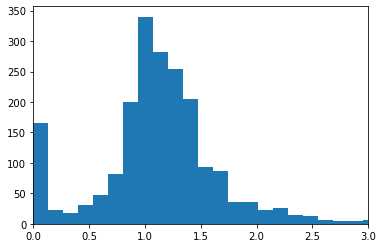

In [26]:
plt.hist(CV, 50)
plt.xlim(0,3)

In [28]:
(1/np.mean(CV))**2

0.7706231037076172

# 0513
diode_OU_tau=500ms_cutoff=0_mean10_amp2_07-Jul-2021_0.mat:  10-2 <br>
diode_OU_tau=500ms_cutoff=2_coeff=0.2_07-Jul-2021_0.mat:    2 -0.4 <br>
diode_OU_tau=500ms_cutoff=2_coeff=0.6_07-Jul-2021_0.mat:    6 -1.2 <br>
diode_OU_tau=500ms_cutoff=2_coeff=1.5_07-Jul-2021_0.mat:    15-3 <br>
diode_OU_tau=500ms_cutoff=2_mean10_amp2_07-Jul-2021_0.mat:  10-2 <br>
diode_OU_tau=500ms_cutoff=2_meaninten=10_07-Jul-2021_0.mat: 10-2 <br>
diode_OU_tau=500ms_cutoff=2_meaninten=15_07-Jul-2021_0.mat: 15-2 <br>
diode_OU_tau=500ms_cutoff=2_meaninten=5_07-Jul-2021_0.mat:  5 -2 <br>
diode_WhiteNoise_mean=5_07-Jul-2021_0.mat:                  5 -2 <br>
diode_WhiteNoise_mean=10_07-Jul-2021_0.mat:                 10-2 <br>
diode_WhiteNoise_mean=15_07-Jul-2021_0.mat:                 15-2 <br>

# 0716
